In [13]:
# python -m pip install prophet
# conda install -c conda-forge prophet

!pip3 install yfinance -q --no-warn-script-location
# !conda install -c conda-forge yfinance
# !conda install conda-forge::yfinance

# conda install -c conda-forge frozendict


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: /usr/local/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip


In [3]:
# !pip3 install yfinance

In [1]:
import pandas as pd
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
# 台積電股票
yahoo = yf.Ticker("2330.TW").history(period="max")
yahoo.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-04 00:00:00+08:00,33.538105,33.538105,32.972860,33.538105,200662336736,0.0,0.0
2000-01-05 00:00:00+08:00,33.538114,34.291714,33.161224,34.291714,402466805912,0.0,0.0
2000-01-06 00:00:00+08:00,34.103350,34.291704,33.538105,33.538105,197545715802,0.0,0.0
2000-01-07 00:00:00+08:00,32.407615,32.972860,32.030726,32.595970,235270344752,0.0,0.0
2000-01-10 00:00:00+08:00,33.538112,33.914822,32.972868,33.726467,276171685539,0.0,0.0


<Axes: xlabel='Date'>

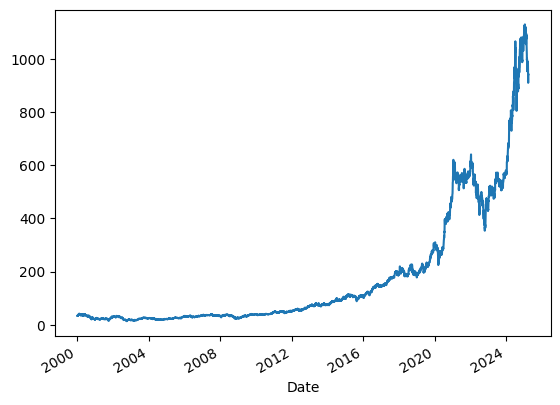

In [5]:
yahoo['Close'].plot()

In [3]:
yahoo.reset_index(inplace=True, drop=False)

In [4]:
yahoo.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
6470,2026-01-05 00:00:00+08:00,1630.0,1695.0,1625.0,1670.0,66871820,0.0,0.0
6471,2026-01-06 00:00:00+08:00,1645.0,1705.0,1645.0,1705.0,46751692,0.0,0.0
6472,2026-01-07 00:00:00+08:00,1665.0,1685.0,1665.0,1675.0,49857449,0.0,0.0
6473,2026-01-08 00:00:00+08:00,1660.0,1700.0,1655.0,1685.0,29215618,0.0,0.0
6474,2026-01-09 00:00:00+08:00,1665.0,1700.0,1655.0,1680.0,39363449,0.0,0.0


In [5]:
df = yahoo[['Date', 'Close']].set_axis(['ds', 'y'], axis='columns')

In [6]:
df.head()

,ds,y
0,2000-01-04 00:00:00+08:00,33.538105
1,2000-01-05 00:00:00+08:00,34.291714
2,2000-01-06 00:00:00+08:00,33.538105
3,2000-01-07 00:00:00+08:00,32.595970
4,2000-01-10 00:00:00+08:00,33.726467


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6475 entries, 0 to 6474
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                      
---  ------  --------------  -----                      
 0   ds      6475 non-null   datetime64[ns, Asia/Taipei]
 1   y       6475 non-null   float64                    
dtypes: datetime64[ns, Asia/Taipei](1), float64(1)
memory usage: 101.3 KB


In [8]:
df['ds'] = df['ds'].dt.tz_localize(None)